In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('mapped_imputed_simulated_transaction_2024.csv')
#bank = pd.read_csv('new_df_withoutmissing.csv')

#print bank dimensions
print(bank.shape)

# remove columns = ['Unamed:0']
#bank = bank.drop(['Unnamed: 0'], axis=1)

bank.head()

(230195, 11)


,Unnamed: 0.1,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
0,0,0,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00,OTHER
1,1,1,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00,Kids Store
2,2,2,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00,NaN
3,3,3,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01 00:00:00,2023-01-01,00:00:00,NaN
4,4,4,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00,Outdoor Clothing Store


### Salary Estimation from company inflows

In [3]:
# filter for positive transactions in 'Amount'
bank_salary = bank[bank['Amount'] > 0]

# filter for to exlude NaN in 'Third Party Name'
bank_salary = bank_salary[bank_salary['Third Party Name'].notnull()]

bank_salary.head()

,Unnamed: 0.1,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
0,0,0,678330503.0,2971.00,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00,2023-01-01,00:00:00,OTHER
1,1,1,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00,2023-01-01,00:00:00,Kids Store
4,4,4,624500124.0,3226.00,1825.00,NaN,Fat Face,2023-01-01 00:00:00,2023-01-01,00:00:00,Outdoor Clothing Store
5,5,5,203466392.0,4607.66,2841.66,NaN,Lavender Primary,2023-01-01 00:00:00,2023-01-01,00:00:00,School
6,6,6,768271776.0,3620.00,1950.00,NaN,A Cut Above,2023-01-01 00:00:00,2023-01-01,00:00:00,Barber


- Many bank payments are direct debits - potentially for mortgage payments, loan repayments etc.

In [4]:
# Convert DateTime to Date and Timestamp features - if using df.csv
bank_salary['Date'] = pd.to_datetime(bank_salary['DateTime']).dt.date
bank_salary['Timestamp'] = pd.to_datetime(bank_salary['DateTime']).dt.time

# get range of times in Timestamp column
print(bank_salary['Timestamp'].min())
print(bank_salary['Timestamp'].max())

00:00:00
23:59:00


- Definitely direct debit salary payments!

In [5]:
# for each account number get count of transactions
count_payments=bank_salary['Account No'].value_counts()
print(count_payments.shape)

# filter for transcations from accounts with 10 transactions in count_payments
#print(count_payments[count_payments == 10])

accounts_10 = count_payments[count_payments == 10].index
#print(accounts_10)

# filter bank_salary for 'Account No' in accounts_10
#bank_salary_10 = bank_salary[bank_salary['Account No'].isin(accounts_10)]


# get first account no in accounts_10 and filter bank_salary for it
account_10 = accounts_10[0]
bank_salary_account_10_ind_0 = bank_salary[bank_salary['Account No'] == account_10]
bank_salary_account_10_ind_0


(616,)


,Unnamed: 0.1,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
20245,20245,20245,653667523.0,2685.615506,1675.0,NaN,Collector Cave,2023-01-31 00:00:00,2023-01-31,00:00:00,Collectables store
38585,38585,38585,653667523.0,3363.393440,1675.0,NaN,Collector Cave,2023-02-28 00:00:00,2023-02-28,00:00:00,Collectables store
56408,56408,56408,653667523.0,3006.508678,1675.0,NaN,Collector Cave,2023-03-31 00:00:00,2023-03-31,00:00:00,Collectables store
74255,74255,74255,653667523.0,4656.767193,1675.0,NaN,Collector Cave,2023-04-30 00:00:00,2023-04-30,00:00:00,Collectables store
93139,93139,93139,653667523.0,6152.945225,1675.0,NaN,Collector Cave,2023-05-31 00:00:00,2023-05-31,00:00:00,Collectables store
112559,112559,112559,653667523.0,4165.129945,1675.0,NaN,Collector Cave,2023-06-30 00:00:00,2023-06-30,00:00:00,Collectables store
133134,133134,133134,653667523.0,4410.547961,1675.0,NaN,Collector Cave,2023-07-31 00:00:00,2023-07-31,00:00:00,Collectables store
154233,154233,154233,653667523.0,5272.090140,1675.0,NaN,Collector Cave,2023-08-31 00:00:00,2023-08-31,00:00:00,Collectables store
176142,176142,176142,653667523.0,5622.171551,1675.0,NaN,Collector Cave,2023-09-30 00:00:00,2023-09-30,00:00:00,Collectables store
220610,220610,220610,653667523.0,5050.163594,1675.0,NaN,Collector Cave,2023-11-30 00:00:00,2023-11-30,00:00:00,Collectables store


- Due to the missing dates in December as well as March - extrapolated salaries can be computed.

In [6]:
# accounts with 11 transactions
accounts_11 = count_payments[count_payments == 11].index

# get first account no in accounts_11 and filter bank_salary for it
account_11 = accounts_11[0]
bank_salary_account_11_ind_0 = bank_salary[bank_salary['Account No'] == account_11]
bank_salary_account_11_ind_0

,Unnamed: 0.1,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
20547,20547,20547,409971170.0,2722.489550,1706.0,NaN,Happy Days Home,2023-01-31 00:00:00,2023-01-31,00:00:00,Furniture Shop
38372,38372,38372,409971170.0,3313.270893,1706.0,NaN,Happy Days Home,2023-02-28 00:00:00,2023-02-28,00:00:00,Furniture Shop
56321,56321,56321,409971170.0,3510.366641,1706.0,NaN,Happy Days Home,2023-03-31 00:00:00,2023-03-31,00:00:00,Furniture Shop
74289,74289,74289,409971170.0,4048.774891,1706.0,NaN,Happy Days Home,2023-04-30 00:00:00,2023-04-30,00:00:00,Furniture Shop
93533,93533,93533,409971170.0,3635.705356,1706.0,NaN,Happy Days Home,2023-05-31 00:00:00,2023-05-31,00:00:00,Furniture Shop
112522,112522,112522,409971170.0,3654.846249,1706.0,NaN,Happy Days Home,2023-06-30 00:00:00,2023-06-30,00:00:00,Furniture Shop
133038,133038,133038,409971170.0,3454.223108,1706.0,NaN,Happy Days Home,2023-07-31 00:00:00,2023-07-31,00:00:00,Furniture Shop
154478,154478,154478,409971170.0,2646.135107,1706.0,NaN,Happy Days Home,2023-08-31 00:00:00,2023-08-31,00:00:00,Furniture Shop
176052,176052,176052,409971170.0,2931.352568,1706.0,NaN,Happy Days Home,2023-09-30 00:00:00,2023-09-30,00:00:00,Furniture Shop
198446,198446,198446,409971170.0,3665.602993,1706.0,NaN,Happy Days Home,2023-10-31 00:00:00,2023-10-31,00:00:00,Furniture Shop


In [7]:
######## 12 transactions - sum annual income

bank_salary_accounts_12 = bank_salary[bank_salary['Account No'].isin(count_payments[count_payments == 12].index)]
annual_income_12=bank_salary_accounts_12.groupby('Account No')['Amount'].sum()
annual_income_12

Account No
104832000.0    20100.0
111137699.0    20100.0
116598243.0    20472.0
119993184.0    20544.0
124102251.0    22999.2
                ...   
977899503.0    19308.0
986774156.0    20100.0
987229118.0    21900.0
994214354.0    35988.0
998390769.0    19500.0
Name: Amount, Length: 292, dtype: float64

In [8]:
######### 11 transactions - take mode 'Amount' and add to annual income

bank_salary_accounts_11 = bank_salary[bank_salary['Account No'].isin(count_payments[count_payments == 11].index)]
annual_income_11=bank_salary_accounts_11.groupby('Account No')['Amount'].sum()

# get mode of 'Amount' for each account
mode_amount_11 = bank_salary_accounts_11.groupby('Account No')['Amount'].agg(lambda x: x.value_counts().index[0])
#mode_amount_11

# add this mode amount to annual_income_11 
annual_income_11_12 = annual_income_11 + mode_amount_11
annual_income_11_12

Account No
101531259.0    18510.0
106601471.0    20100.0
108481285.0    19008.0
108563213.0    44988.0
108931112.0    57348.0
                ...   
992204045.0    54996.0
994947671.0    21456.0
995615876.0    20796.0
996042490.0    45000.0
999752672.0    32496.0
Name: Amount, Length: 320, dtype: float64

In [9]:
######### 10 transactions - take mode 'Amount', multiply by 2, and add to sum of annual income

bank_salary_accounts_10 = bank_salary[bank_salary['Account No'].isin(count_payments[count_payments == 10].index)]
annual_income_10=bank_salary_accounts_10.groupby('Account No')['Amount'].sum()

# get mode of 'Amount' for each account
mode_amount_10 = bank_salary_accounts_10.groupby('Account No')['Amount'].agg(lambda x: x.value_counts().index[0])
#mode_amount_11

# add this mode amount to annual_income_11 
annual_income_10_12 = annual_income_10 + 2*mode_amount_10
annual_income_10_12

Account No
653667523.0    20100.0
727417797.0    18510.0
871866387.0    20544.0
954263768.0    18540.0
Name: Amount, dtype: float64

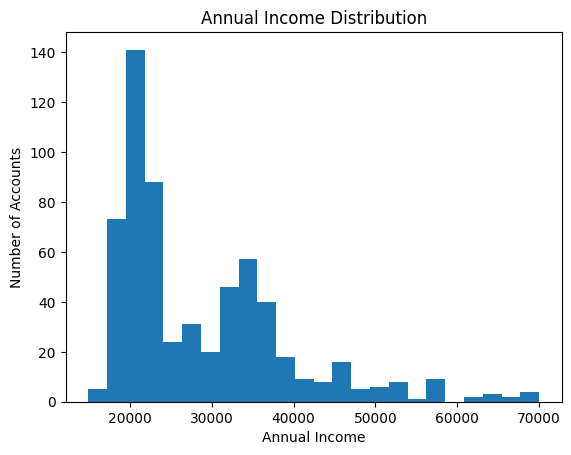

In [10]:
# vertically concatenate annual_income_10_12, annual_income_11_12, annual_income_12
annual_income = pd.concat([annual_income_10_12, annual_income_11_12, annual_income_12])
annual_income.shape

# histogram of annual_income

# get correct bin size
from scipy.stats import iqr

bin_size = int(np.sqrt(annual_income.shape[0]))

plt.hist(annual_income, bins=bin_size)
plt.xlabel('Annual Income')
plt.ylabel('Number of Accounts')
plt.title('Annual Income Distribution') 
plt.show()

### Salary from personal incomings

In [11]:
#get positive transactions in 'Amount'
bank_person_salary = bank[bank['Amount'] > 0]

# filter for to exlude NaN in 'Third Party Account No'
bank_person_salary = bank_person_salary[bank_person_salary['Third Party Account No'].notnull()]

# groupby the 'Account No' and sum the 'Amount' for each account
annual_income_personal = bank_person_salary.groupby('Account No')['Amount'].count()
print(annual_income_personal.shape)

# counts of transactions for each account
count_payments_personal=bank_person_salary['Account No'].value_counts()

(397,)


In [86]:
# get all positive incoming transactions from bank
bank_incoming = bank[bank['Amount'] > 0]

# groupby and sum the 'Amount' for each 'Account No'
bank_incoming_count = bank_incoming.groupby('Account No')['Amount'].count()

# filter bank_incoming_count for Account No with regular incoming transactions
bank_incoming_count = bank_incoming_count[bank_incoming_count > 10]

# filter bank_incoming for Account No in bank_incoming_count
bank_incoming = bank_incoming[bank_incoming['Account No'].isin(bank_incoming_count.index)]

# get annual income for each account
annual_income_total = bank_incoming.groupby('Account No')['Amount'].sum()

annual_income_total.shape

(808,)

### Expenditure-to-Income model - Company Salaries Only

In [13]:
# filter bank for negative transactions in 'Amount'
bank_expenses = bank[bank['Amount'] < 0]

# filter for to exlude NaN in 'Third Party Account No'
# Could include money going to other people - but only looking at money being spent in businesses
bank_expenses = bank_expenses[bank_expenses['Third Party Account No'].isnull()]

bank_expenses.head()    

,Unnamed: 0.1,Unnamed: 0,Account No,Balance,Amount,Third Party Account No,Third Party Name,DateTime,Date,Timestamp,group
495,495,495,355733816.0,526.00,-664.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
496,496,496,472213568.0,2412.00,-600.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
497,497,497,624500124.0,2572.00,-654.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
498,498,498,203466392.0,3935.66,-672.0,NaN,Halifax,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking
499,499,499,768271776.0,2208.00,-632.0,NaN,LBG,2023-01-01 00:00:00,2023-01-01,00:00:00,Banking


In [34]:
# Pivot table to sum of transactions for each 'Third Party Name' for each 'Account No'
expenses_pivot = bank_expenses.pivot_table(index='Account No', columns='group', values='Amount', aggfunc='sum')

# We are not going to fill NaNs with zeros - as this disturbs our distributions

# take absolute value of 'Amount' in each column
expenses_pivot = expenses_pivot.abs()

expenses_pivot.head()

group,Arts and Crafts Store,Banking,Barber,Books and Stationary,Café,Clothing Store,Collectables store,Department Store,Entertainment,Food Delivery,...,Park,Pet Store,Pharmacy,Pub,Restaurant,School,Sports Field,Sports Store,Supermarket,Tayloring Shop
Account No,,,,,,,,,,,,,,,,,,,,,
101531259.0,513.66,10308.0,NaN,NaN,NaN,2200.50,NaN,NaN,95.88,87.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.99,2394.86,NaN
104832000.0,NaN,10332.0,200.0,NaN,NaN,NaN,NaN,NaN,191.88,211.33,...,NaN,NaN,7.31,NaN,NaN,NaN,NaN,NaN,3619.33,NaN
105375973.0,NaN,NaN,NaN,462.18,NaN,639.15,NaN,2414.01,287.76,134.64,...,NaN,NaN,69.03,12.9,NaN,NaN,NaN,2577.30,258.79,2023.97
106601471.0,148.81,NaN,NaN,199.82,NaN,3042.28,NaN,33.72,191.88,398.88,...,NaN,NaN,159.38,23.9,NaN,NaN,NaN,257.02,1039.83,123.03
108481285.0,1190.93,NaN,NaN,124.88,NaN,2219.30,NaN,236.04,183.77,64.28,...,NaN,NaN,660.89,NaN,NaN,NaN,NaN,1901.14,1528.08,362.81


In [37]:
# Filter expenses_pivot for accounts with computed salaries in annual_income --% can maybe add personal accounts here too
expenses_pivot = expenses_pivot[expenses_pivot.index.isin(annual_income.index)]
expenses_pivot.shape

(616, 31)

In [36]:
# count how many sparse columns there are with more than 50% of values as 0
expenses_pivot_zero =expenses_pivot.fillna(0)
sparse_columns = expenses_pivot_zero.columns[(expenses_pivot_zero == 0).mean() > 0.5]
len(sparse_columns)

17

- 15 columns (half of all merchants) have extremely sparse feature vectors.

In [38]:
#### calculate ratio of expenses to annual income for each account and each group

# Sort Account No in annual_income and expenses_pivot
annual_income = annual_income.sort_index()
expenses_pivot = expenses_pivot.sort_index()

# divide expenses_pivot by annual_income
expenses_ratio = expenses_pivot.div(annual_income, axis=0)


print(expenses_ratio.shape) 
expenses_ratio.head()

(616, 31)


group,Arts and Crafts Store,Banking,Barber,Books and Stationary,Café,Clothing Store,Collectables store,Department Store,Entertainment,Food Delivery,...,Park,Pet Store,Pharmacy,Pub,Restaurant,School,Sports Field,Sports Store,Supermarket,Tayloring Shop
Account No,,,,,,,,,,,,,,,,,,,,,
101531259.0,0.027750,0.556888,NaN,NaN,NaN,0.118882,NaN,NaN,0.005180,0.004715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016693,0.129382,NaN
104832000.0,NaN,0.514030,0.00995,NaN,NaN,NaN,NaN,NaN,0.009546,0.010514,...,NaN,NaN,0.000364,NaN,NaN,NaN,NaN,NaN,0.180066,NaN
106601471.0,0.007403,NaN,NaN,0.009941,NaN,0.151357,NaN,0.001678,0.009546,0.019845,...,NaN,NaN,0.007929,0.001189,NaN,NaN,NaN,0.012787,0.051733,0.006121
108481285.0,0.062654,NaN,NaN,0.006570,NaN,0.116756,NaN,0.012418,0.009668,0.003382,...,NaN,NaN,0.034769,NaN,NaN,NaN,NaN,0.100018,0.080391,0.019087
108563213.0,0.004845,NaN,NaN,0.000445,NaN,0.117279,NaN,0.007941,0.006396,0.001851,...,NaN,NaN,0.008419,NaN,NaN,NaN,NaN,0.043217,0.105010,0.013871


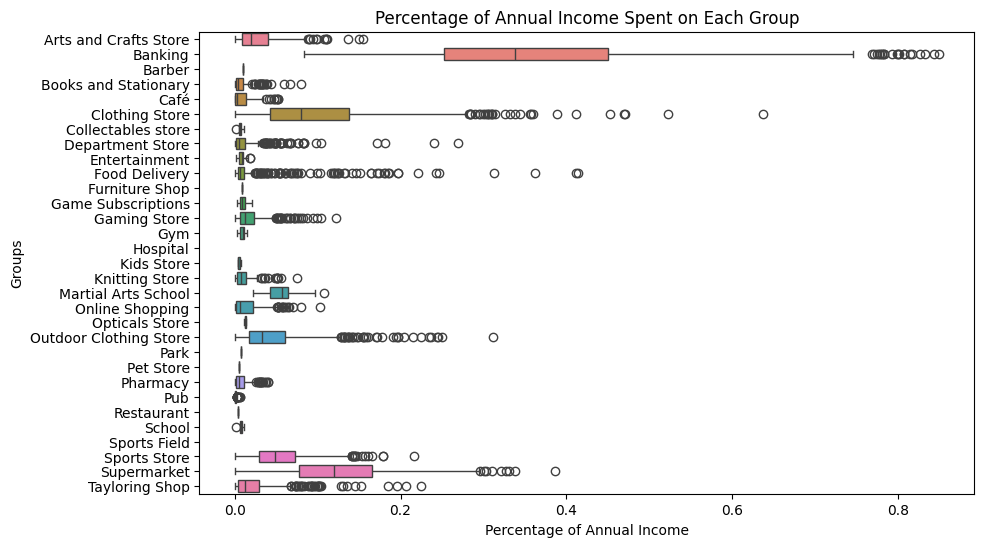

In [39]:
# plot percentage spent on each group 
plt.figure(figsize=(10, 6))
sns.boxplot(data=expenses_ratio, orient='h')
plt.xlabel('Percentage of Annual Income')
plt.ylabel('Groups')
plt.title('Percentage of Annual Income Spent on Each Group')
plt.show()

<Figure size 3000x2000 with 0 Axes>

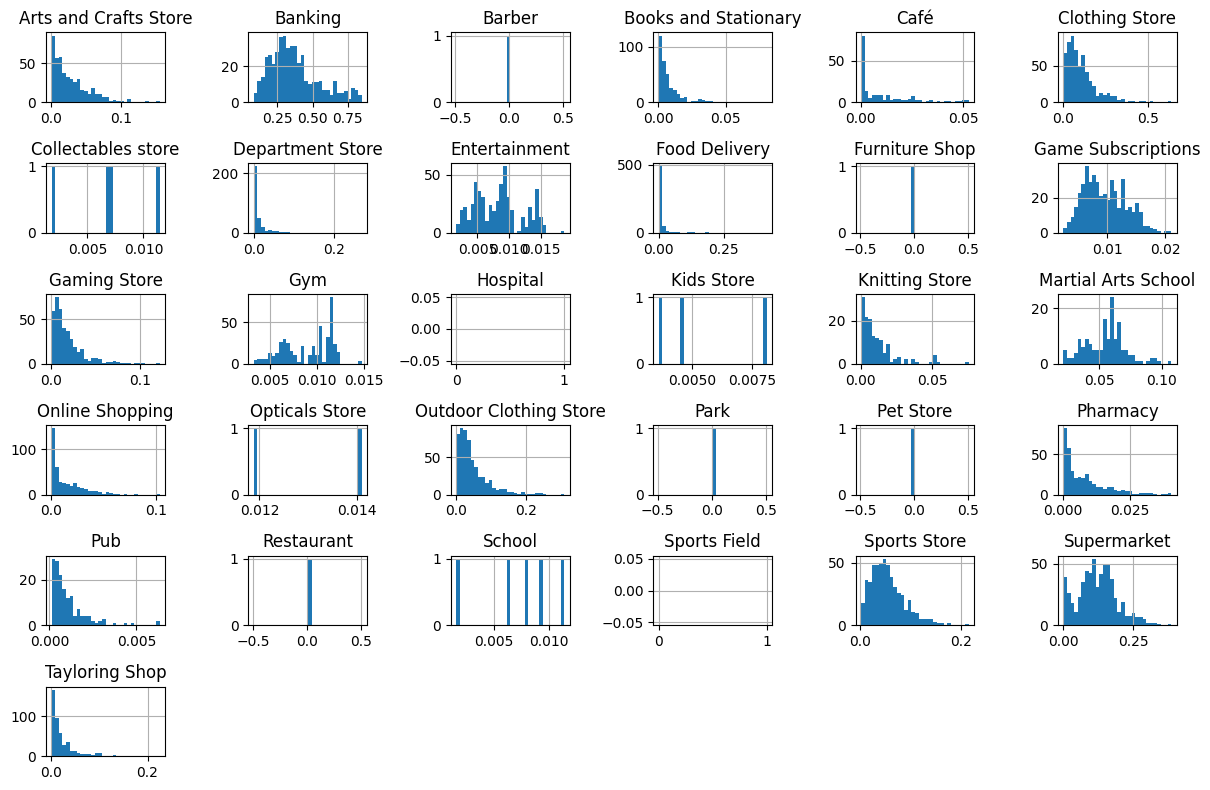

In [40]:
# plot of values in each feature in expenses_ratio as a histogram
plt.figure(figsize=(30, 20))
expenses_ratio.hist(bins=30, figsize=(12, 8))
plt.xlabel('Percentage of Annual Income')
plt.ylabel('Number of Accounts')
plt.title('Percentage of Annual Income Spent on Each Group')
plt.tight_layout()
plt.show()


In [41]:
# set zero values as NaNs
expenses_ratio_nonzero = expenses_ratio.replace(0, np.nan)

<Figure size 3000x2000 with 0 Axes>

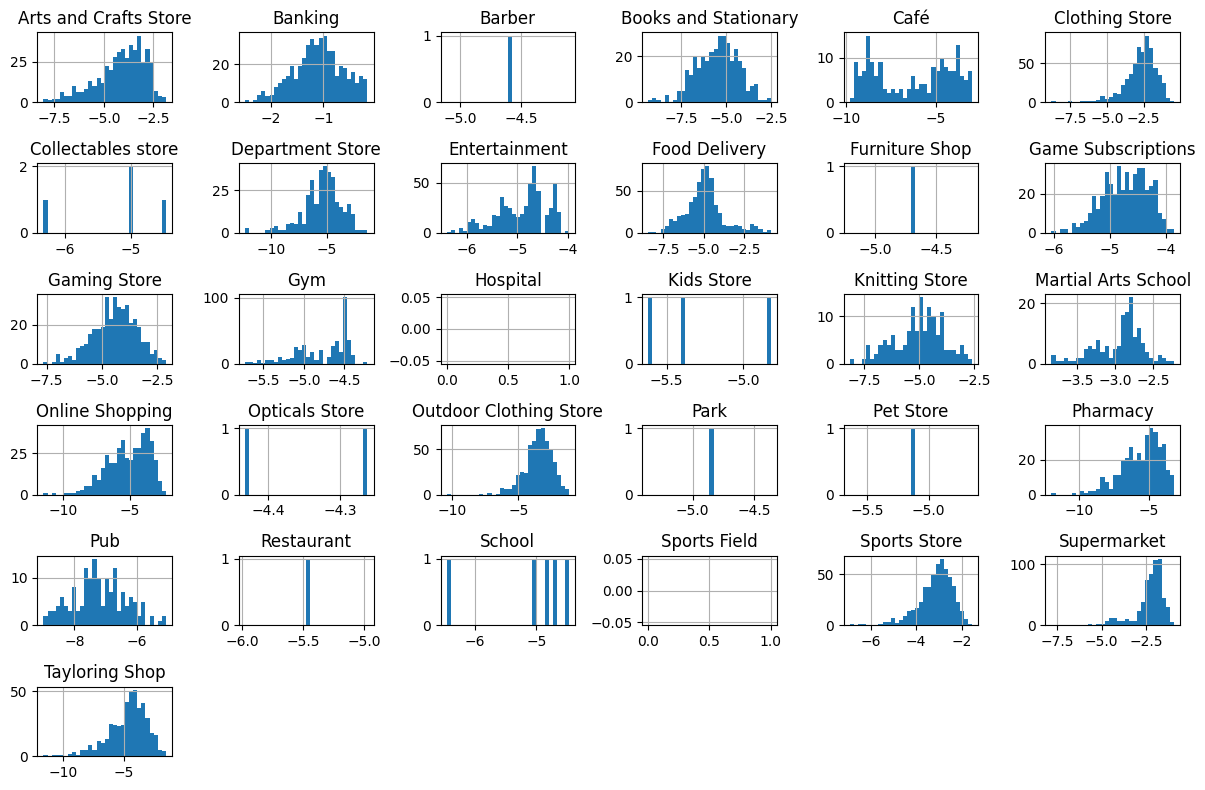

In [42]:
# take log transformation of expenses_ratio for each feature
expenses_ratio_log = np.log(expenses_ratio_nonzero)

# plot of values in each feature in expenses_ratio_log as a histogram
plt.figure(figsize=(30, 20))
expenses_ratio_log.hist(bins=30, figsize=(12, 8))
plt.xlabel('Log Percentage of Annual Income')
plt.ylabel('Number of Accounts')
plt.title('Log Percentage of Annual Income Spent on Each Group')
plt.tight_layout()
plt.show()

-Entertainment,gym are all subscriptions of fixed prices - so can ignore.

<Figure size 3000x2000 with 0 Axes>

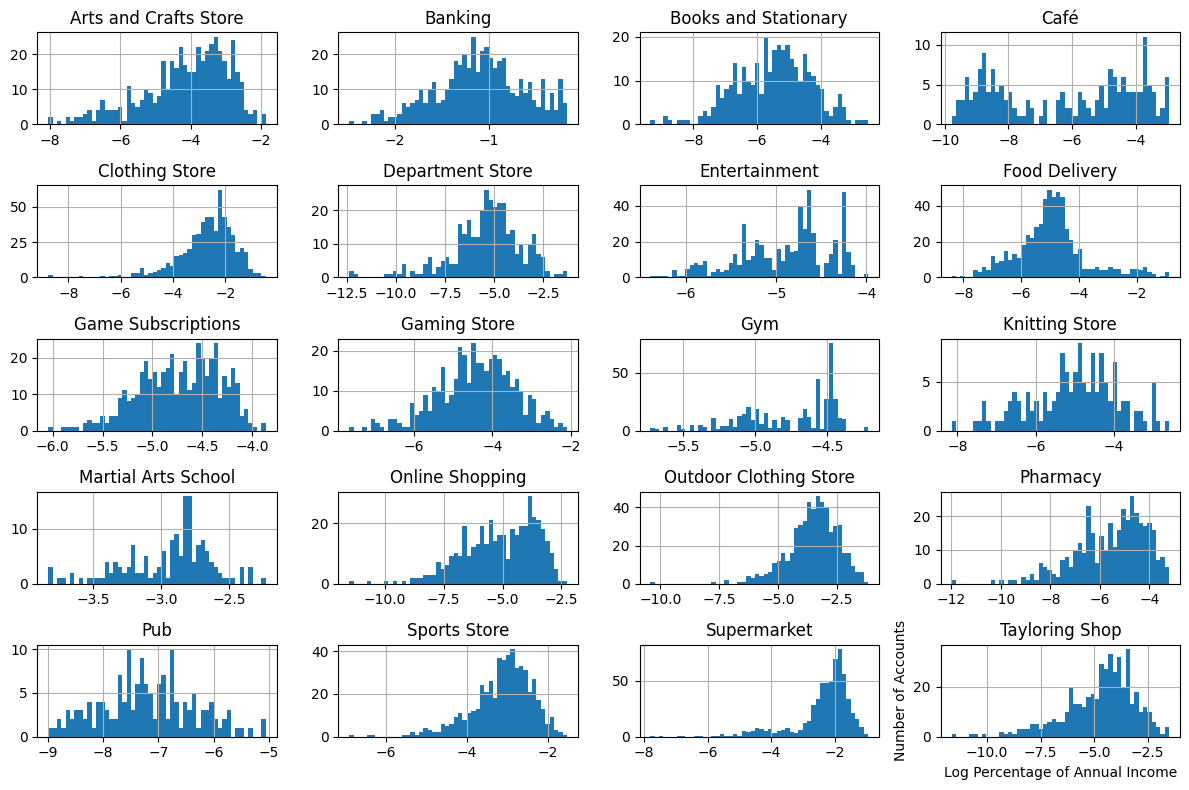

In [43]:
drop_columns = [ 'Park','Sports Field', 
                'Kids Store', 'Pet Store', 'Restaurant', 
                'Opticals Store', 'Collectables store', 'Barber', 'Kids Store', 'Furniture Shop','Hospital', 'School']

expenses_ratio_log_dropped = expenses_ratio_log.drop(drop_columns,axis=1)

# plot of values in each feature in expenses_ratio_log as a histogram
plt.figure(figsize=(30, 20))
expenses_ratio_log_dropped.hist(bins=50, figsize=(12, 8))
plt.xlabel('Log Percentage of Annual Income')
plt.ylabel('Number of Accounts')
# space out figures
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

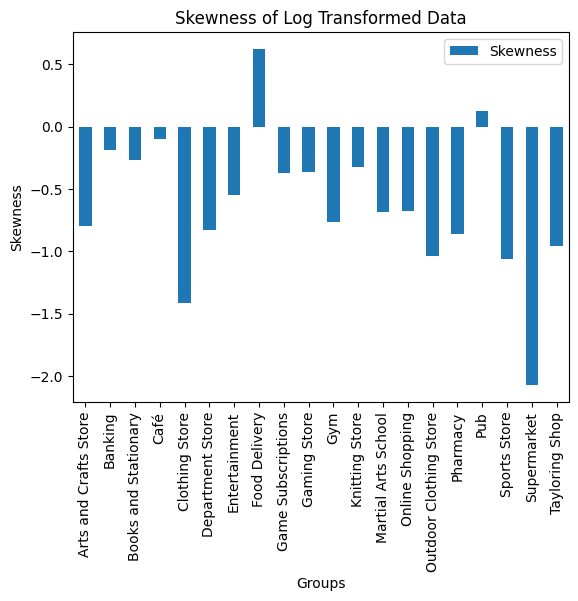

In [44]:
from scipy import stats

# Initialize an empty DataFrame to store the skewness
skewness = pd.DataFrame()

# Loop over each column in the DataFrame
for col in expenses_ratio_log_dropped.columns:
    # Extract the column
    feature_vector = expenses_ratio_log_dropped[col]
    
    # Replace zeros with np.nan
    feature_vector = feature_vector.replace(0, np.nan)
    
    # Drop np.nan values
    feature_vector = feature_vector.dropna()
    
    # Calculate skewness and store it in the skewness DataFrame
    skewness.loc[col, 'Skewness'] = stats.skew(feature_vector)

# Plot skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar')
plt.xlabel('Groups')
plt.ylabel('Skewness')
plt.title('Skewness of Log Transformed Data')
plt.show()

In [45]:
# get mean and variance of each feature in expenses_ratio_log
mean_log = expenses_ratio_log_dropped.mean()
var_log = expenses_ratio_log_dropped.var()

# transform back into original log normal scale
upper_threshold_log = mean_log + np.sqrt(var_log)
lower_threshold_log = mean_log - np.sqrt(var_log)

#################### Set Thresholds
# flag accounts with expenses greater than 1 standard deviations from the mean per group
upper_threshold = np.exp(upper_threshold_log)
lower_threshold = np.exp(lower_threshold_log)

# Set upper threshold based on 80th percentile
#upper_threshold = expenses_ratio.quantile(0.75)
#lower_threshold = expenses_ratio.quantile(0.2)

#################### Label
# label accounts with expenses greater than 1 standard deviations from the mean per group with 'High Spender'

expenses_ratio_labelled = expenses_ratio.copy()

expenses_ratio_labelled = expenses_ratio_labelled.drop(drop_columns, axis=1)

# Convert the DataFrame to object type to allow mixed types (floats and strings)
expenses_ratio_labelled = expenses_ratio_labelled.astype(object)
for i in range(len(expenses_ratio_labelled)):
    for j in range(len(expenses_ratio_labelled.columns)):
        if not np.isnan(expenses_ratio_labelled.iloc[i, j]):
            if expenses_ratio_labelled.iloc[i, j] > upper_threshold.iloc[j]:
                expenses_ratio_labelled.iloc[i, j] = 'High Spender'
            elif expenses_ratio_labelled.iloc[i, j] < lower_threshold.iloc[j]:
                expenses_ratio_labelled.iloc[i, j] = 'Low Spender'
            else:
                expenses_ratio_labelled.iloc[i, j] = 'Normal Spender'

#expenses_ratio_labelled.head()


In [46]:
# get normalised count in each feature
expenses_ratio_labelled_count = expenses_ratio_labelled.apply(lambda x: x.value_counts(normalize=True))
expenses_ratio_labelled_count

group,Arts and Crafts Store,Banking,Books and Stationary,Café,Clothing Store,Department Store,Entertainment,Food Delivery,Game Subscriptions,Gaming Store,Gym,Knitting Store,Martial Arts School,Online Shopping,Outdoor Clothing Store,Pharmacy,Pub,Sports Store,Supermarket,Tayloring Shop
High Spender,0.156652,0.175589,0.156977,0.215909,0.119048,0.139942,0.197417,0.120661,0.174292,0.157360,0.074074,0.126761,0.101911,0.167064,0.137363,0.158177,0.173077,0.143123,0.060755,0.122271
Low Spender,0.160944,0.175589,0.177326,0.272727,0.132653,0.128280,0.158672,0.142149,0.161220,0.152284,0.194444,0.183099,0.171975,0.171838,0.148352,0.150134,0.179487,0.143123,0.129721,0.148472
Normal Spender,0.682403,0.648822,0.665698,0.511364,0.748299,0.731778,0.643911,0.737190,0.664488,0.690355,0.731481,0.690141,0.726115,0.661098,0.714286,0.691689,0.647436,0.713755,0.809524,0.729258


### Expenditure-to-income ratio - Gross income

<Figure size 3000x2000 with 0 Axes>

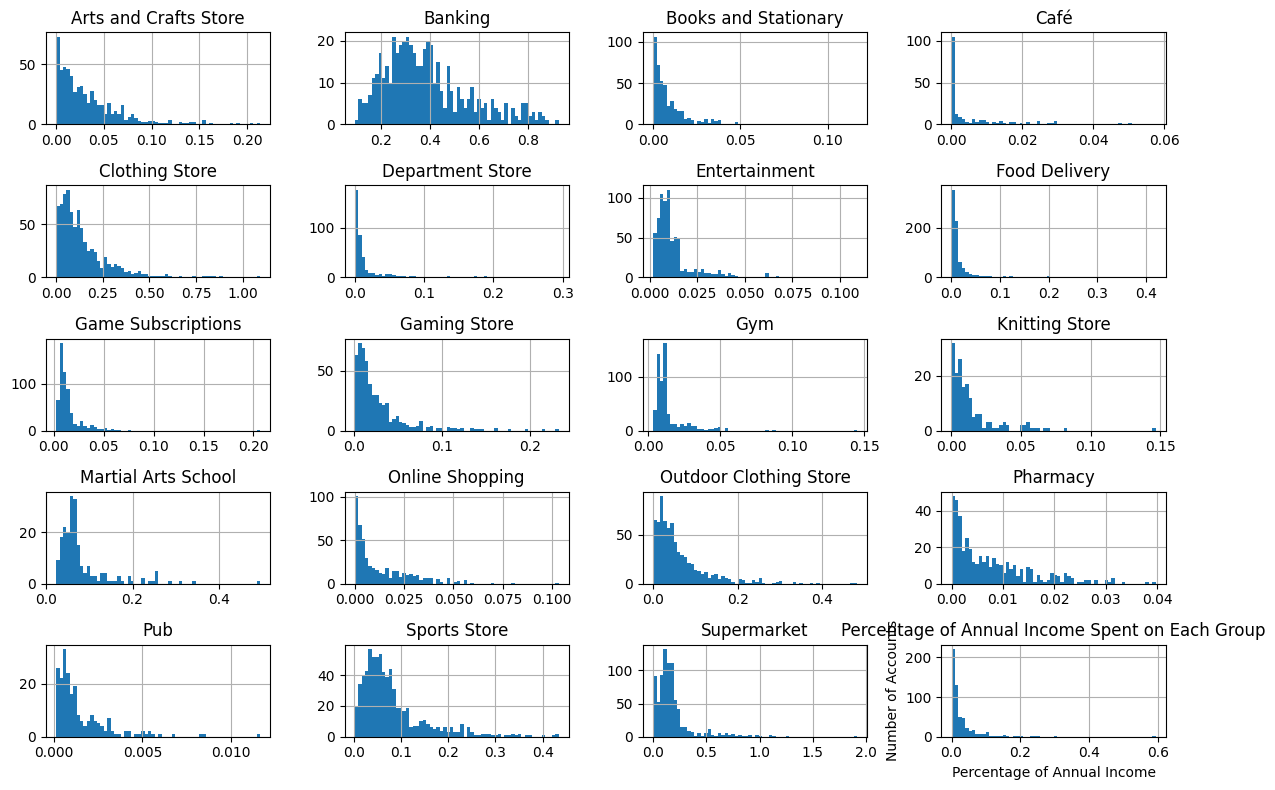

In [87]:
# Filter expenses_pivot for accounts with computed salaries in annual_income including  personal accounts here too
expenses_pivot = expenses_pivot[expenses_pivot.index.isin(annual_income_total.index)]
expenses_pivot.shape

#### only around 876 accounts actually getting income


# Make all values positive in expenses_pivot
expenses_pivot = expenses_pivot.abs()

# reindex annual_income_total to match expenses_pivot
annual_income_total = annual_income_total.reindex(expenses_pivot.index)

# get ratio of expenses to annual income for each account
expenses_ratio_total = expenses_pivot.div(annual_income_total, axis=0)

# drop these columns
drop_columns = [ 'Park','Sports Field', 
                'Kids Store', 'Pet Store', 'Restaurant', 
                'Opticals Store', 'Collectables store', 'Barber', 'Kids Store', 'Furniture Shop','Hospital', 'School']

expenses_ratio_total = expenses_ratio_total.drop(drop_columns,axis=1)

# histogram for each feature in expenses_ratio_total
plt.figure(figsize=(30, 20))
expenses_ratio_total.hist(bins=60, figsize=(12, 8))
plt.xlabel('Percentage of Annual Income')
plt.ylabel('Number of Accounts')
plt.title('Percentage of Annual Income Spent on Each Group')
plt.tight_layout()
plt.show()

<Figure size 3000x2000 with 0 Axes>

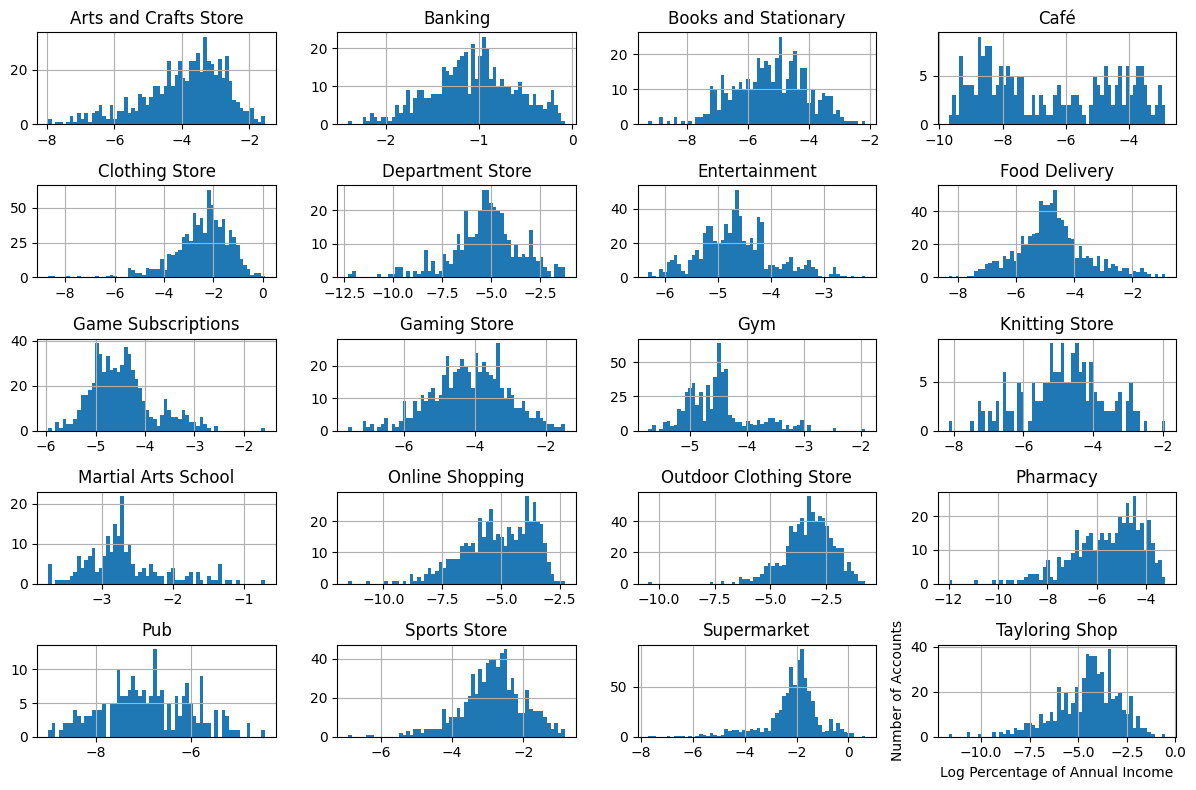

In [88]:
# take log transform of each feature in expenses_ratio_total
expenses_ratio_total_log = np.log(expenses_ratio_total)

# histogram for each feature in expenses_ratio_total_log
plt.figure(figsize=(30, 20))
expenses_ratio_total_log.hist(bins=60, figsize=(12, 8))
plt.xlabel('Log Percentage of Annual Income')
plt.ylabel('Number of Accounts')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

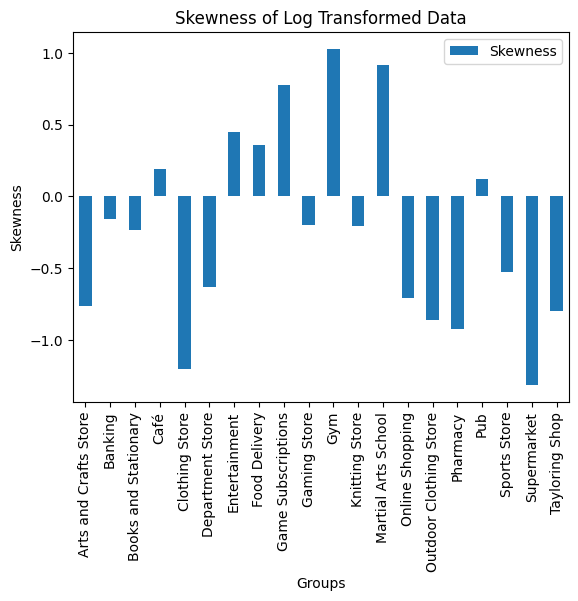

In [89]:
# get skewness of log transformed features in expenses_ratio_total_log
skewness_total = pd.DataFrame()

for col in expenses_ratio_total_log.columns:
    feature_vector = expenses_ratio_total_log[col]
    feature_vector = feature_vector.replace(0, np.nan)
    feature_vector = feature_vector.dropna()
    skewness_total.loc[col, 'Skewness'] = stats.skew(feature_vector)

# plot skewness of log transformed features in expenses_ratio_total_log
plt.figure(figsize=(10, 6))
skewness_total.plot(kind='bar')
plt.xlabel('Groups')
plt.ylabel('Skewness')
plt.title('Skewness of Log Transformed Data')
plt.show()

In [90]:
# get mean and variance of each feature in expenses_ratio_total_log
mean_log_total = expenses_ratio_total_log.mean()
var_log_total = expenses_ratio_total_log.var()

# get thresholds for each feature in expenses_ratio_total_log
upper_threshold_log_total = mean_log_total + np.sqrt(var_log_total)
lower_threshold_log_total = mean_log_total - np.sqrt(var_log_total)

# flag accounts with expenses greater than 1 standard deviations from the mean per group
upper_threshold_total = np.exp(upper_threshold_log_total)
lower_threshold_total = np.exp(lower_threshold_log_total)

# label accounts with expenses greater than 1 standard deviations from the mean per group with 'High Spender'
expenses_ratio_total_labelled = expenses_ratio_total.copy()

# Convert the DataFrame to object type to allow mixed types (floats and strings)
expenses_ratio_total_labelled = expenses_ratio_total_labelled.astype(object)

for i in range(len(expenses_ratio_total_labelled)):
    for j in range(len(expenses_ratio_total_labelled.columns)):
        if not np.isnan(expenses_ratio_total_labelled.iloc[i, j]):
            if expenses_ratio_total_labelled.iloc[i, j] > upper_threshold_total.iloc[j]:
                expenses_ratio_total_labelled.iloc[i, j] = 'High Spender'
            elif expenses_ratio_total_labelled.iloc[i, j] < lower_threshold_total.iloc[j]:
                expenses_ratio_total_labelled.iloc[i, j] = 'Low Spender'
            else:
                expenses_ratio_total_labelled.iloc[i, j] = 'Normal Spender'
                

# get normalised count in each feature
expenses_ratio_total_labelled_count = expenses_ratio_total_labelled.apply(lambda x: x.value_counts(normalize=True))
expenses_ratio_total_labelled_count

group,Arts and Crafts Store,Banking,Books and Stationary,Café,Clothing Store,Department Store,Entertainment,Food Delivery,Game Subscriptions,Gaming Store,Gym,Knitting Store,Martial Arts School,Online Shopping,Outdoor Clothing Store,Pharmacy,Pub,Sports Store,Supermarket,Tayloring Shop
High Spender,0.143333,0.172199,0.150562,0.244131,0.135417,0.150754,0.140625,0.141058,0.150413,0.155894,0.15331,0.152047,0.153846,0.183673,0.149296,0.145882,0.179724,0.158042,0.093867,0.147425
Low Spender,0.158333,0.161826,0.170787,0.206573,0.136719,0.130653,0.137784,0.139798,0.122314,0.165399,0.12892,0.175439,0.129808,0.159184,0.128169,0.152941,0.170507,0.138462,0.122653,0.140320
Normal Spender,0.698333,0.665975,0.678652,0.549296,0.727865,0.718593,0.721591,0.719144,0.727273,0.678707,0.71777,0.672515,0.716346,0.657143,0.722535,0.701176,0.649770,0.703497,0.783479,0.712256


### Overall spend-to-income flag model - including repetitive personal incomes

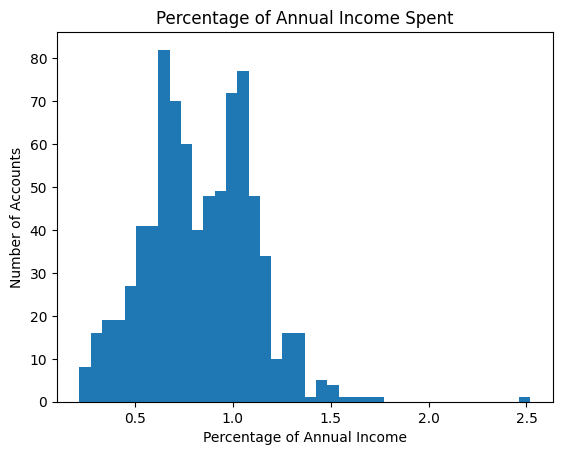

In [113]:
# sum expenses for each account
expenses_total = expenses_pivot.sum(axis=1)

# ensure same index for annual_income_total and expenses_total
annual_income_total.sort_index(inplace=True)
expenses_total.sort_index(inplace=True)

# calculate ratio of expenses to annual income for each account
expenses_ratio_total = expenses_total.div(annual_income_total)

# plot histogram of expenses_ratio_total
plt.hist(expenses_ratio_total, bins=40)
plt.xlabel('Percentage of Annual Income')
plt.ylabel('Number of Accounts')
plt.title('Percentage of Annual Income Spent')
plt.show()

In [105]:
# set a threshold for overall_spend_income_ratio
mean = expenses_ratio_total.mean()
std = expenses_ratio_total.std()

upper_threshold = mean + std
lower_threshold = mean - std

# get percentage of data contained between these thresholds
percentage = ((expenses_ratio_total < upper_threshold) & (expenses_ratio_total > lower_threshold)).mean()

# percentage of values above 1 standard deviation from the mean
percentage_upper = (expenses_ratio_total > upper_threshold).mean()
percentage_lower = (expenses_ratio_total < lower_threshold).mean()

# print percentage of values within 1sd of the mean
print(f'Percentage of accounts within 1 STD of mean = {percentage:0.4f}%')
print(f'Percentage of accounts exceeding 1 STD + mean = {percentage_upper:0.4f}%')
print(f'Percentage of accounts below 1 STD - mean = {percentage_upper:0.4f}%')


#print upper and lower thresholds
print(upper_threshold)
print(lower_threshold)

Percentage of accounts within 1 STD of mean = 0.7042%
Percentage of accounts exceeding 1 STD + mean = 0.1386%
Percentage of accounts below 1 STD - mean = 0.1386%
1.1057655059992482
0.5599368551655697


In [106]:
# label accounts in overall_spend_income_ratio with 'Excessive Spender' if above upper_threshold, 'Frugal Spender' if below lower_threshold, and 'Normal Spender' otherwise

overall_spend_income_ratio_labelled = expenses_ratio_total.copy()

# Convert the Series to object type to allow mixed types (floats and strings)
overall_spend_income_ratio_labelled = overall_spend_income_ratio_labelled.astype(object)

for i in range(len(overall_spend_income_ratio_labelled)):
    if overall_spend_income_ratio_labelled.iloc[i] > upper_threshold:
        overall_spend_income_ratio_labelled.iloc[i] = 'Excessive Spender'
    elif overall_spend_income_ratio_labelled.iloc[i] < lower_threshold:
        overall_spend_income_ratio_labelled.iloc[i] = 'Frugal Spender'
    else:
        overall_spend_income_ratio_labelled.iloc[i] = 'Normal Spender'
        
# get normalised count in each feature
overall_spend_income_ratio_labelled_count = overall_spend_income_ratio_labelled.value_counts(normalize=True)
overall_spend_income_ratio_labelled_count

Normal Spender       0.704208
Frugal Spender       0.157178
Excessive Spender    0.138614
Name: proportion, dtype: float64

### Overall Aggregated expenditure to company salary ratios

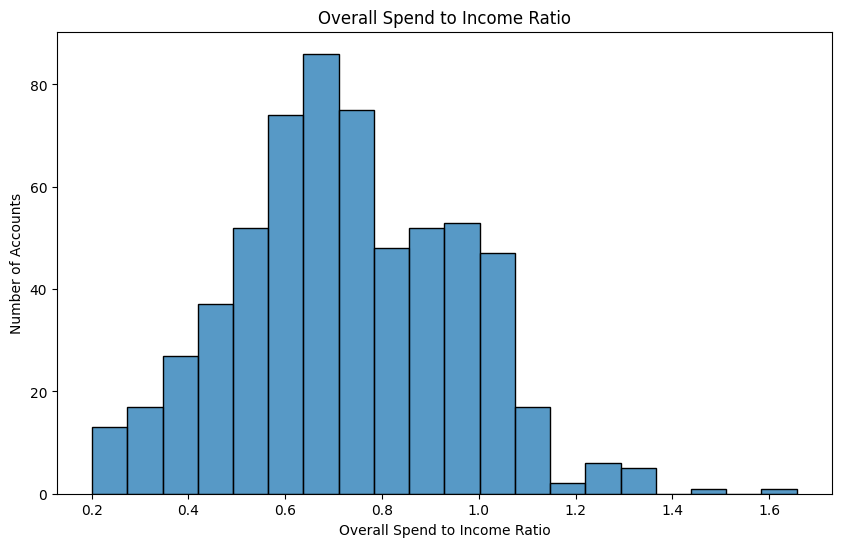

In [107]:
# sort expenses_pivot and annual_income by index
expenses_pivot = expenses_pivot.sort_index()
annual_income = annual_income.sort_index()
expenses_pivot_sum = expenses_pivot.sum(axis=1)

# calculate overall spend to income ratio
overall_spend_income_ratio = expenses_pivot_sum / annual_income


# plot overall_spend_income_ratio
plt.figure(figsize=(10, 6))
sns.histplot(overall_spend_income_ratio)
plt.xlabel('Overall Spend to Income Ratio')
plt.ylabel('Number of Accounts')
plt.title('Overall Spend to Income Ratio')
plt.show()

In [108]:
# get skewness
skewness_overall = stats.skew(overall_spend_income_ratio)
skewness_overall

nan

In [109]:
# set a threshold for overall_spend_income_ratio
mean = overall_spend_income_ratio.mean()
std = overall_spend_income_ratio.std()

upper_threshold = mean + std
lower_threshold = mean - std

# get percentage of data contained between these thresholds
percentage = ((overall_spend_income_ratio < upper_threshold) & (overall_spend_income_ratio > lower_threshold)).mean()

# percentage of values above 1 standard deviation from the mean
percentage_upper = (overall_spend_income_ratio > upper_threshold).mean()
percentage_lower = (overall_spend_income_ratio < lower_threshold).mean()

# print percentage of values within 1sd of the mean
print(f'Percentage of accounts within 1 STD of mean = {percentage:0.4f}%')
print(f'Percentage of accounts exceeding 1 STD + mean = {percentage_upper:0.4f}%')
print(f'Percentage of accounts below 1 STD - mean = {percentage_upper:0.4f}%')


#print upper and lower thresholds
print(upper_threshold)
print(lower_threshold)

Percentage of accounts within 1 STD of mean = 0.5018%
Percentage of accounts exceeding 1 STD + mean = 0.1356%
Percentage of accounts below 1 STD - mean = 0.1356%
0.9576553419529115
0.4973541631556948


In [110]:
# label accounts in overall_spend_income_ratio with 'Excessive Spender' if above upper_threshold, 'Frugal Spender' if below lower_threshold, and 'Normal Spender' otherwise

overall_spend_income_ratio_labelled = overall_spend_income_ratio.copy()

# Convert the Series to object type to allow mixed types (floats and strings)
overall_spend_income_ratio_labelled = overall_spend_income_ratio_labelled.astype(object)

for i in range(len(overall_spend_income_ratio_labelled)):
    if overall_spend_income_ratio_labelled.iloc[i] > upper_threshold:
        overall_spend_income_ratio_labelled.iloc[i] = 'Excessive Spender'
    elif overall_spend_income_ratio_labelled.iloc[i] < lower_threshold:
        overall_spend_income_ratio_labelled.iloc[i] = 'Frugal Spender'
    else:
        overall_spend_income_ratio_labelled.iloc[i] = 'Normal Spender'
        
# get normalised count in each feature
overall_spend_income_ratio_labelled_count = overall_spend_income_ratio_labelled.value_counts(normalize=True)
overall_spend_income_ratio_labelled_count

Normal Spender       0.745993
Excessive Spender    0.135635
Frugal Spender       0.118372
Name: proportion, dtype: float64